In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
flc = '/Users/pinqingkan/Desktop/Codes/Course_ISLR/data/'
fname = flc + 'Smarket.csv'

In [3]:
X = pd.read_csv(fname, index_col=0)

training and test data separation kept the same with 4.6.5

In [4]:
# split into training (before 2005) and testing sets
xtrain = X[X.Year < 2005][['Lag1', 'Lag2']]
ytrain = X[X.Year < 2005].Direction.map({'Up': 1, 'Down': 0})
xtest  = X[X.Year >= 2005][['Lag1', 'Lag2']]
ytest  = X[X.Year >= 2005].Direction.map({'Up': 1, 'Down': 0})
_, Nx = xtrain.shape

for this data set, KNN is showing less accuracy than QDA, with the largest score at Nneighbors = 2

In [5]:
# KNN
model = KNN(n_neighbors = 1).fit(xtrain, ytrain)

In [6]:
# confusion matrix for test data in year 2005
inds = X[X.Year == 2005].index
ytest2 = model.predict(xtest.loc[inds, :])
metricC = confusion_matrix(ytest, ytest2)
print('true negatives: ', metricC[0, 0], '\t false negatives: ', metricC[1, 0])
print('false positives: ', metricC[0, 1], '\t true positives: ', metricC[1, 1])

true negatives:  43 	 false negatives:  58
false positives:  68 	 true positives:  83


In [7]:
# for test data in year 2005
print('% of correctly predicted: ', sum(ytest == ytest2) / len(inds))

% of correctly predicted:  0.5


In [8]:
# probability of a test data point
model.predict_proba(xtest.loc[inds[1], :].values.reshape(1, 2))

array([[1., 0.]])

In [9]:
# mean accuracy on test data
model.score(xtest, ytest)

0.5

In [10]:
# test a range of n_neighbors
scores0 = []
for ineighbor in range(5):
    model = KNN(n_neighbors = ineighbor + 1).fit(xtrain, ytrain)
    scores0.append(model.score(xtest, ytest))

Text(0.5, 1.0, 'max score 0.53')

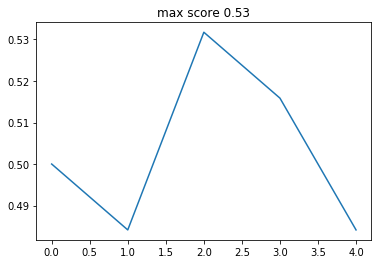

In [11]:
fig, ax1 = plt.subplots(1, 1)
ax1.plot(scores0)
fttl = 'max score ' +  '%.2f' % (max(scores0))
ax1.set_title(fttl)

In [12]:
ytrain2 = model.predict(xtrain)
tp = (ytrain == ytrain2)
tp0, tp1 = tp[ytrain == 0], tp[ytrain == 1] # T / F for true negative & true positive
xtrain0, xtrain1 = xtrain[ytrain == 0], xtrain[ytrain == 1]
xtrain0_tp, xtrain0_fp = xtrain0[tp0], xtrain0[~tp0] # ytrain = ytrain2 = 0; ytrain = 0, ytrain2 = 1
xtrain1_tp, xtrain1_fp = xtrain1[tp1], xtrain1[~tp1] # ytrain = ytrain2 = 1; ytrain = 1, ytrain2 = 0

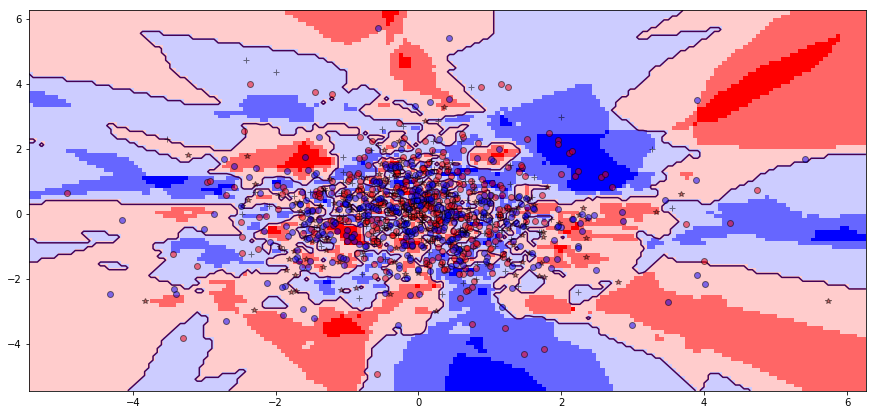

In [13]:
ig, ax1 = plt.subplots(1, 1, figsize = (15, 7))

# class 0: dots
alpha = 0.5
plt.plot(xtrain0_tp.iloc[:, 0], xtrain0_tp.iloc[:, 1], 'o', alpha=alpha,
         color='red', markeredgecolor='k')
plt.plot(xtrain0_fp.iloc[:, 0], xtrain0_fp.iloc[:, 1], '*', alpha=alpha,
         color='#990000', markeredgecolor='k')  # dark red
# class 1: dots
plt.plot(xtrain1_tp.iloc[:, 0], xtrain1_tp.iloc[:, 1], 'o', alpha=alpha,
         color='blue', markeredgecolor='k')
plt.plot(xtrain1_fp.iloc[:, 0], xtrain1_fp.iloc[:, 1], '+', alpha=alpha,
         color='#000099', markeredgecolor='k')  # dark blue

# class 0 and 1 : areas
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape) # probability of 1
plt.pcolormesh(xx, yy, Z, cmap='bwr',
                norm=colors.Normalize(0., 1.))
plt.contour(xx, yy, Z, [0.5]) # line of probability = 0.5